In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

100%|██████████| 8.70k/8.70k [00:00<00:00, 2.22MB/s]

Extracting files...
Path to dataset files: C:\Users\Dell\.cache\kagglehub\datasets\spscientist\students-performance-in-exams\versions\1


### Import & Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "../data/StudentsPerformance.csv"
# Load dataset
df = pd.read_csv(path)

# Display first few rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Clean & Explore Data

In [3]:
# Basic info
print(df.info())

# Check for missing data
print(df.isnull().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Rename columns for clarity
df.columns = [c.strip().replace(" ", "_").lower() for c in df.columns]

df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Data Analysis & Insights

In [4]:
# Average scores by gender
df.groupby('gender')[['math_score','reading_score','writing_score']].mean()

# Effect of test preparation course
df.groupby('test_preparation_course')[['math_score','reading_score','writing_score']].mean()

# Average scores by parental education
df.groupby('parental_level_of_education')[['math_score','reading_score','writing_score']].mean().sort_values(by='math_score', ascending=False)


,math_score,reading_score,writing_score
parental_level_of_education,,,
master's degree,69.745763,75.372881,75.677966
bachelor's degree,69.389831,73.000000,73.381356
associate's degree,67.882883,70.927928,69.896396
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268
high school,62.137755,64.704082,62.448980


### Visualization

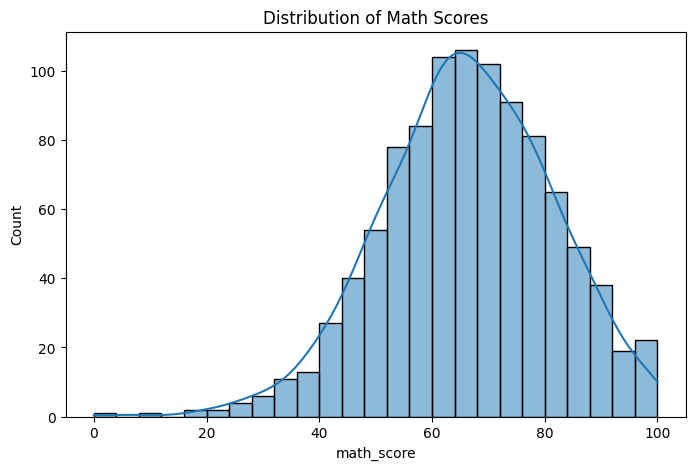

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['math_score'], kde=True)
plt.title('Distribution of Math Scores')
plt.show()




C:\Users\Dell\AppData\Local\Temp\ipykernel_6044\1643377387.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='math_score', data=df, ci=None)


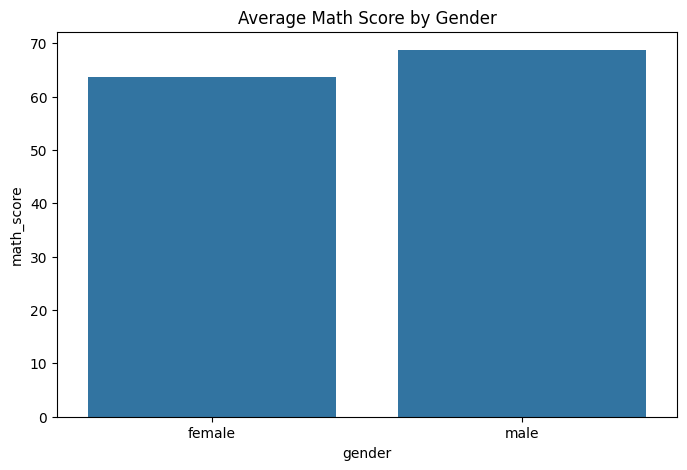

In [6]:
# Gender vs average scores
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='math_score', data=df, ci=None)
plt.title('Average Math Score by Gender')
plt.show()



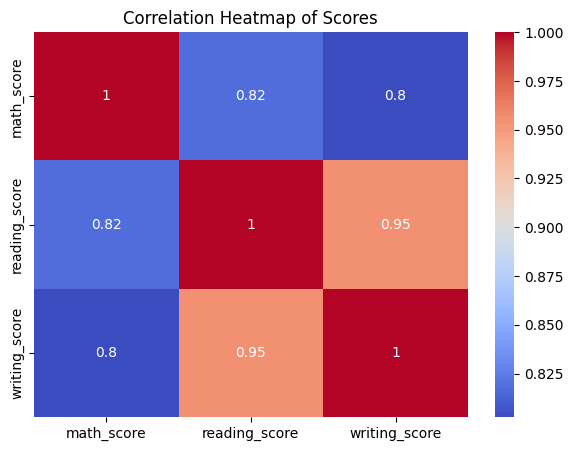

In [7]:
# Correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df[['math_score','reading_score','writing_score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Scores')
plt.show()


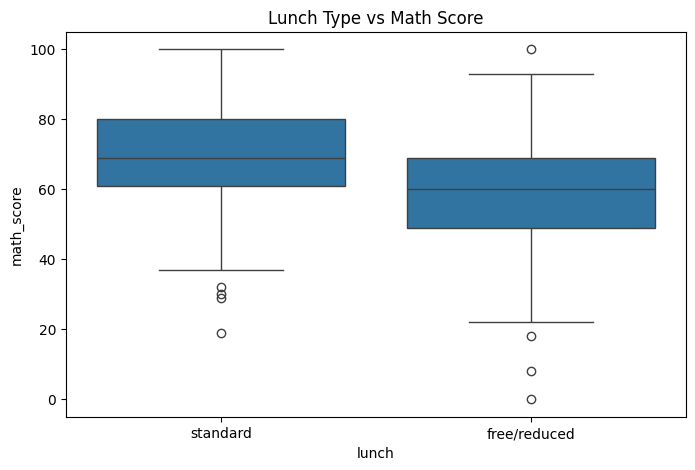

In [8]:
# Boxplot - Lunch type vs Scores
plt.figure(figsize=(8,5))
sns.boxplot(x='lunch', y='math_score', data=df)
plt.title('Lunch Type vs Math Score')
plt.show()

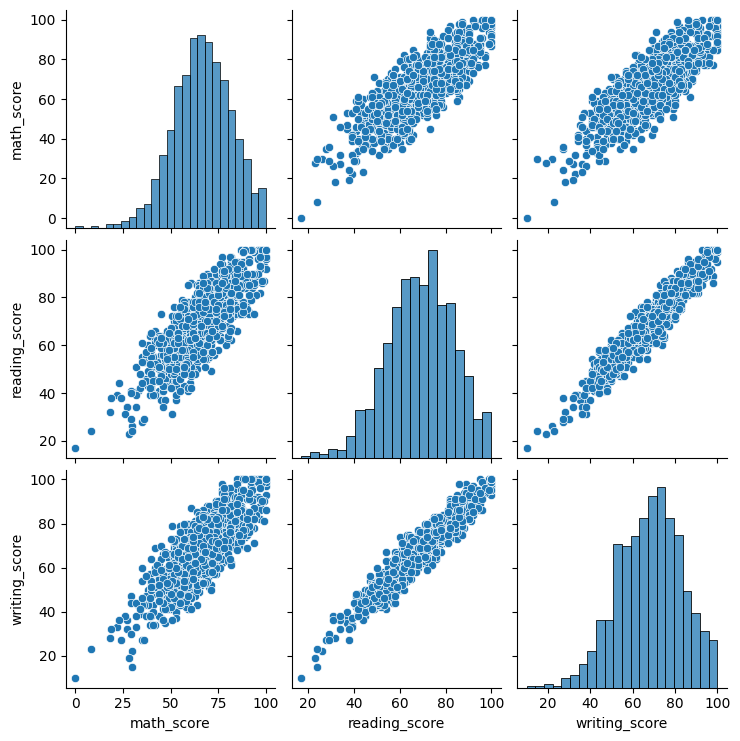

In [9]:
sns.pairplot(df[['math_score','reading_score','writing_score']])


### 
Save & Export

In [10]:
df.to_csv("../data/cleaned_students_performance.csv", index=False)
